In [1]:
# DON'T FORGET TO ACTIVATE THE GPU when on google colab (Edit > Notebook settings)

from os import environ
GOOGLE_COLAB = True if "COLAB_GPU" in environ else False
if GOOGLE_COLAB:
    !pip install git+https://github.com/undark-lab/swyft.git

In [2]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats

np.random.seed(27);
torch.manual_seed(27);

In [3]:
DEVICE = 'cuda'

In [4]:
def model(v):
    a = v[0]
    b = v[1]
    x=np.array([a,2*(b-a)])
    return dict(mu=x)

def noise(obs, v, noise = 0.01):
    x = obs['mu']
    n = np.random.randn(*x.shape)*noise
    return dict(x=x + n)

In [5]:
v0 = np.array([0.55, 0.45])
obs0 = model(v0)

In [6]:
simulator = swyft.Simulator(model, sim_shapes = {"mu": (2,)})
prior = swyft.Prior.from_uv(lambda u: u, 2)

In [7]:
store = swyft.MemoryStore(['z0', 'z1'], simulator = simulator)

In [8]:
micro = swyft.Microscope([(0, 1)], prior, obs0, store = store, simhook = noise, device = DEVICE, Ninit = 500)
micro.focus(max_rounds=5)
post = swyft.Posteriors.from_Microscope(micro)

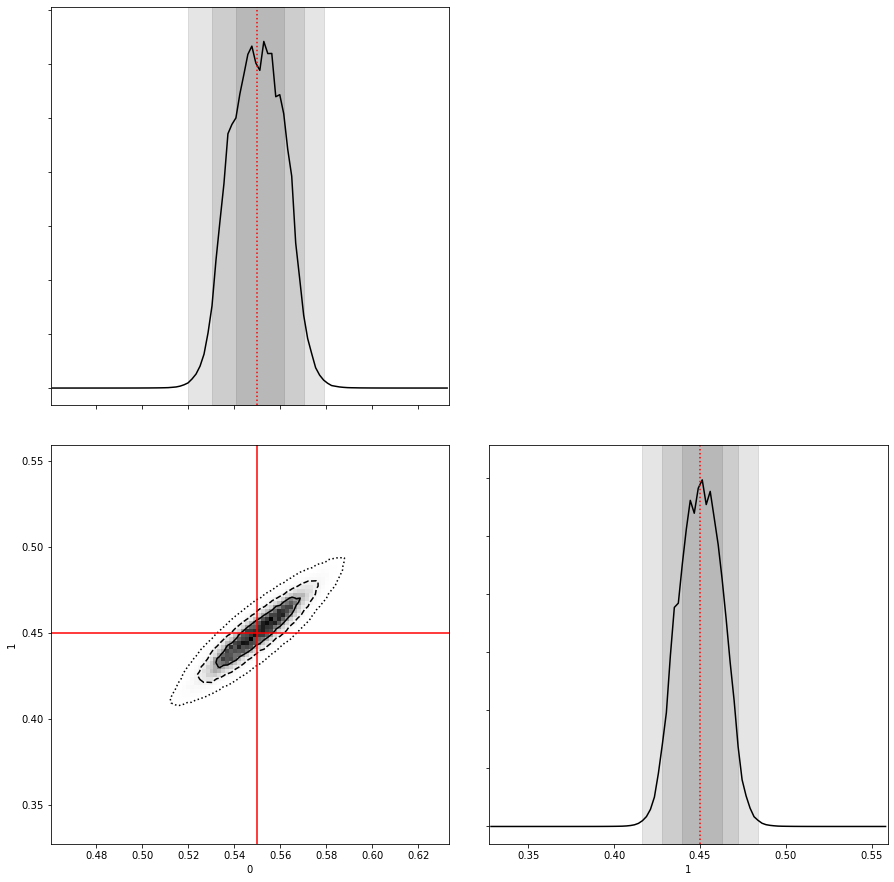

In [9]:
samples = post.sample(400000, obs0)
swyft.corner(samples, [0, 1], color='k', figsize = (15,15), truth=v0, bins = 100)